In [1]:
from transformers import BertConfig
from gnn import GNNTrainer
from movie_lens_loader import MovieLensLoader
from llm import PromptBertClassifier, VanillaBertClassifier, AddingEmbeddingsBertClassifierBase

import itertools

import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import torch
from torch.utils.data import DataLoader
import networkx as nx

In [2]:
config = BertConfig.from_pretrained("google/bert_uncased_L-2_H-128_A-2")
KGE_DIMENSION_PROMPT = 4
KGE_DIMENSION_ADDING = 128
KGE_DIMENSIONS = [KGE_DIMENSION_PROMPT, KGE_DIMENSION_ADDING] # Output Dimension of the GNN Encoder.
model_max_length = 256
movie_lens_loader = MovieLensLoader(kge_dimensions = KGE_DIMENSIONS)
gnn_trainer_prompt =    GNNTrainer(movie_lens_loader.data, kge_dimension = KGE_DIMENSION_PROMPT)
gnn_trainer_prompt.get_embeddings(movie_lens_loader)
gnn_trainer_adding =    GNNTrainer(movie_lens_loader.data, hidden_channels=KGE_DIMENSION_ADDING, kge_dimension = KGE_DIMENSION_ADDING)
gnn_trainer_adding.get_embeddings(movie_lens_loader)
vanilla_bert_only_classifier = VanillaBertClassifier(movie_lens_loader.llm_df,model_max_length = model_max_length)
dataset_vanilla = movie_lens_loader.generate_vanilla_dataset(vanilla_bert_only_classifier.tokenize_function)
prompt_bert_only_classifier = PromptBertClassifier(movie_lens_loader, gnn_trainer_prompt.get_embedding, kge_dimension=gnn_trainer_prompt.kge_dimension, batch_size=64,model_max_length = model_max_length)
dataset_prompt = movie_lens_loader.generate_prompt_embedding_dataset(prompt_bert_only_classifier.tokenize_function, kge_dimension = prompt_bert_only_classifier.kge_dimension)
adding_embedding_bert_only_classifier = AddingEmbeddingsBertClassifierBase(movie_lens_loader, gnn_trainer_adding.get_embedding, kge_dimension=config.hidden_size, batch_size=64,model_max_length = model_max_length)
dataset_adding_embedding = movie_lens_loader.generate_adding_embedding_dataset(adding_embedding_bert_only_classifier.tokenizer.sep_token, adding_embedding_bert_only_classifier.tokenizer.pad_token, adding_embedding_bert_only_classifier.tokenize_function, kge_dimension = config.hidden_size)

loading pretrained model
Device: 'cpu'
loading pretrained model
Device: 'cpu'


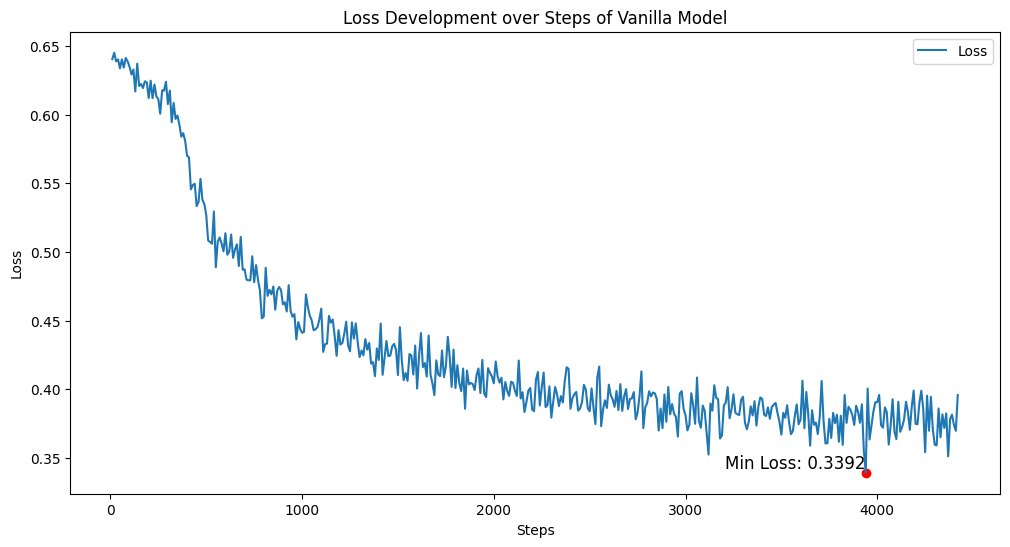

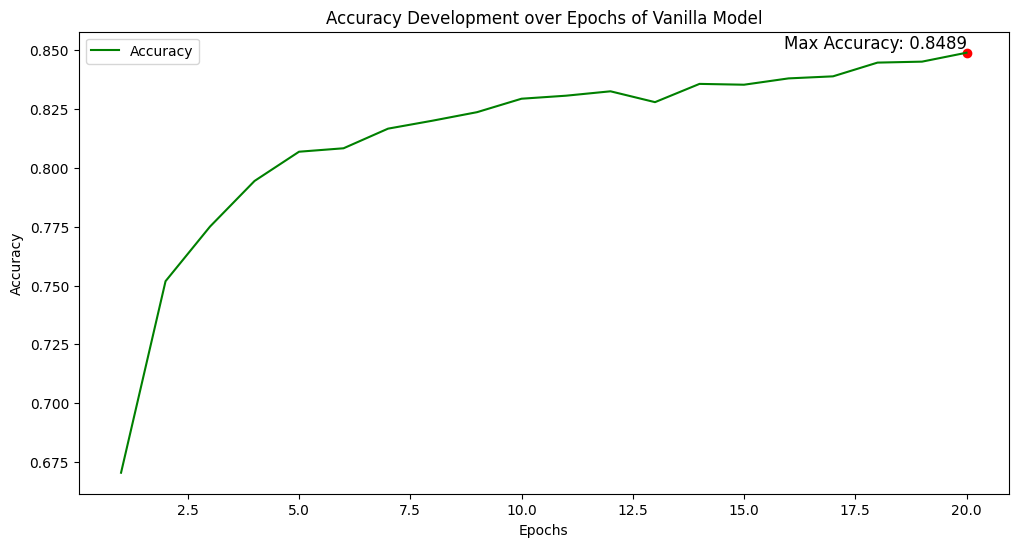

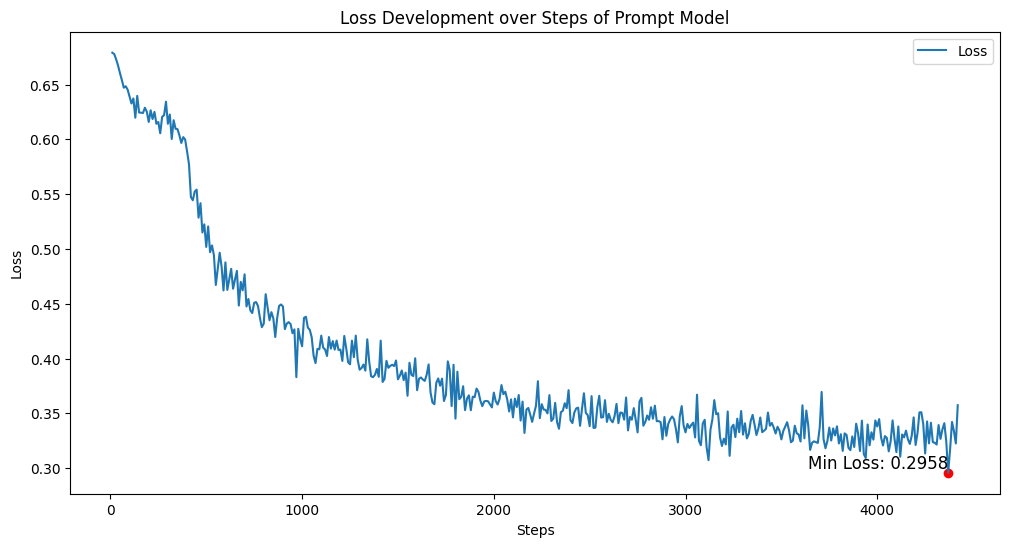

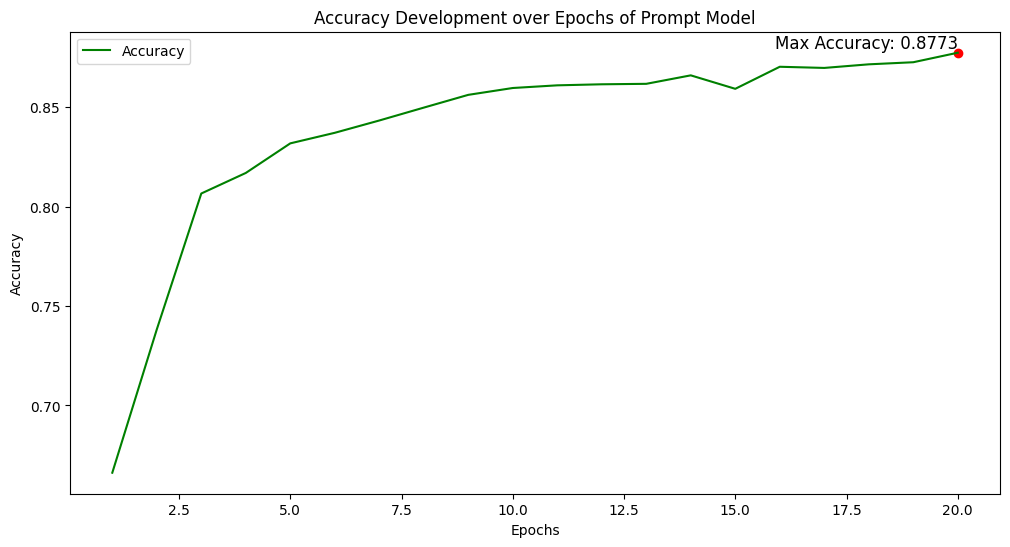

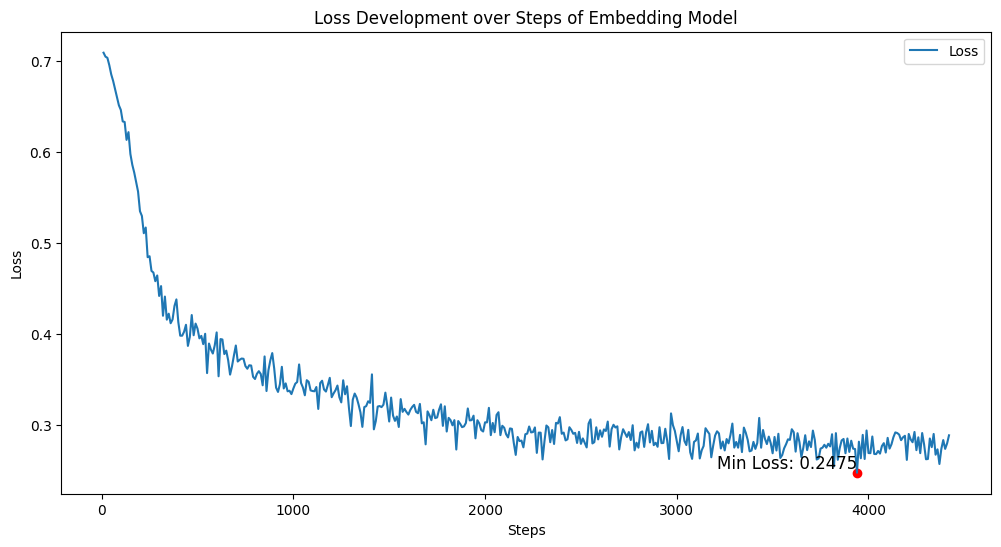

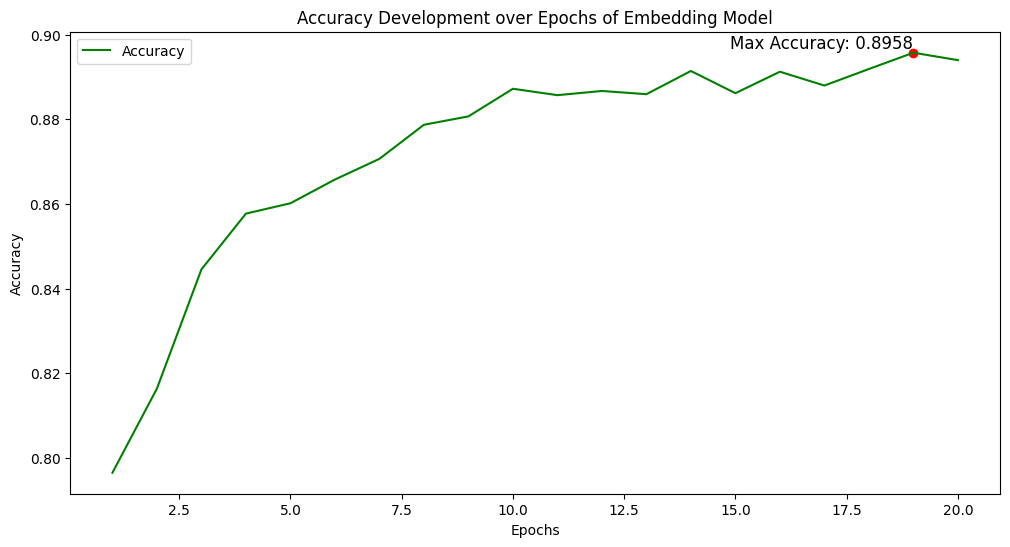

In [3]:
vanilla_bert_only_classifier.plot_training_loss_and_accuracy()
prompt_bert_only_classifier.plot_training_loss_and_accuracy()
adding_embedding_bert_only_classifier.plot_training_loss_and_accuracy()

In [ ]:
vanilla_bert_only_classifier.plot_confusion_matrix(split = "val", dataset = dataset_vanilla)
prompt_bert_only_classifier.plot_confusion_matrix(split = "val", dataset = dataset_prompt)
adding_embedding_bert_only_classifier.plot_confusion_matrix(split = "val", dataset = dataset_adding_embedding)


In [ ]:
vanilla_attention_matrix, vanilla_attention_matrix_normalized = vanilla_bert_only_classifier.generate_semantic_attention_matrix(dataset_vanilla)
prompt_attention_matrix, prompt_attention_matrix_normalized = prompt_bert_only_classifier.generate_semantic_attention_matrix(dataset_prompt)
adding_embedding_attention_matrix, adding_embedding_attention_matrix_normalized = adding_embedding_bert_only_classifier.generate_semantic_attention_matrix(dataset_adding_embedding)

BertSdpaSelfAttention is used but `torch.nn.functional.scaled_dot_product_attention` does not support non-absolute `position_embedding_type` or `output_attentions=True` or `head_mask`. Falling back to the manual attention implementation, but specifying the manual implementation will be required from Transformers version v5.0.0 onwards. This warning can be removed using the argument `attn_implementation="eager"` when loading the model.


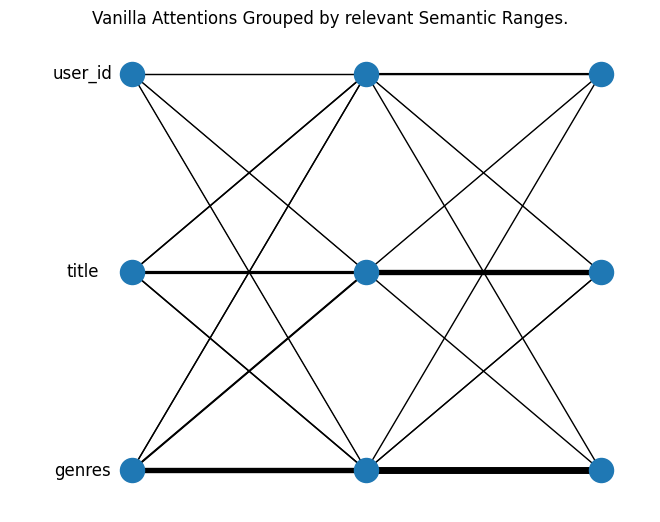

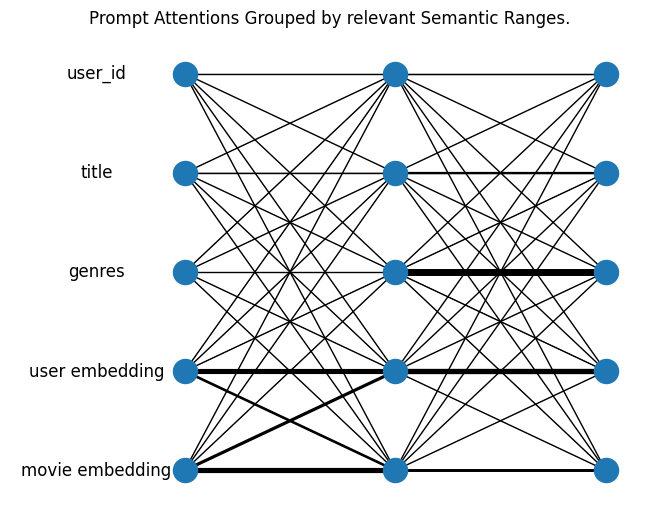

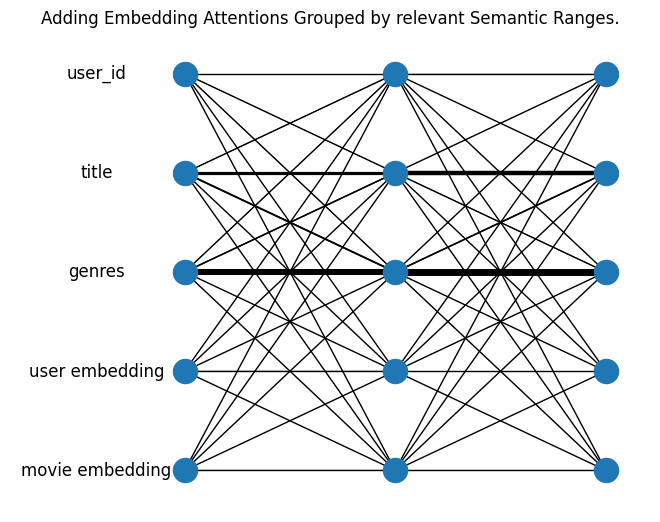

In [ ]:
vanilla_bert_only_classifier.plot_attention_graph(vanilla_attention_matrix, "Vanilla Attentions Grouped by relevant Semantic Ranges.")
prompt_bert_only_classifier.plot_attention_graph(prompt_attention_matrix, "Prompt Attentions Grouped by relevant Semantic Ranges.")
adding_embedding_bert_only_classifier.plot_attention_graph(adding_embedding_attention_matrix, "Adding Embedding Attentions Grouped by relevant Semantic Ranges.")

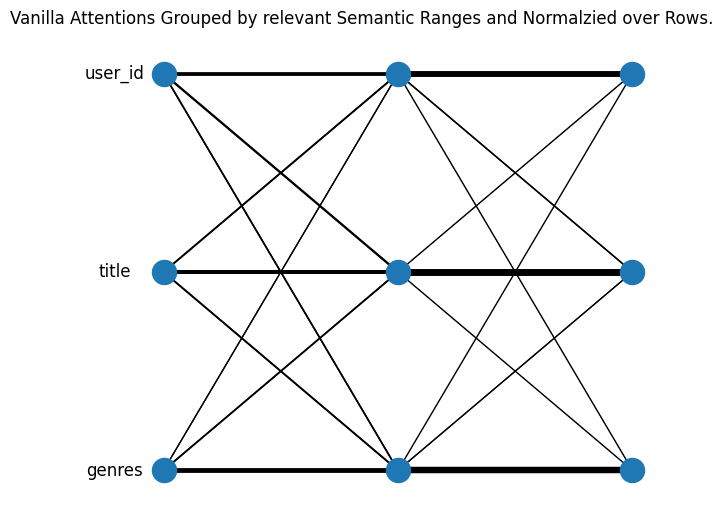

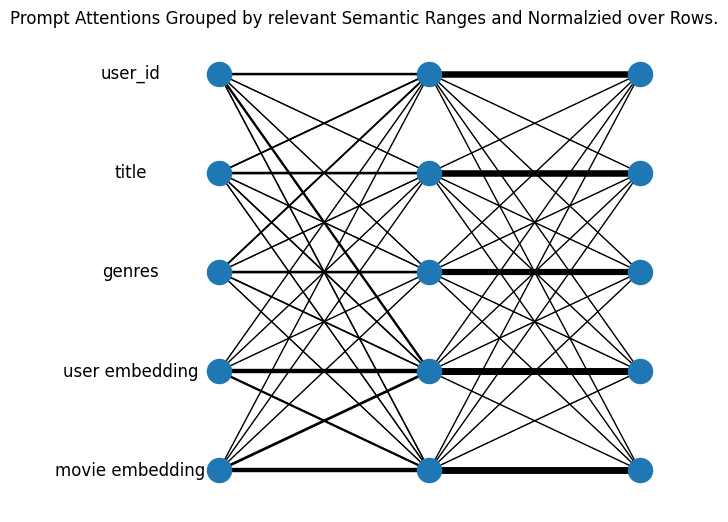

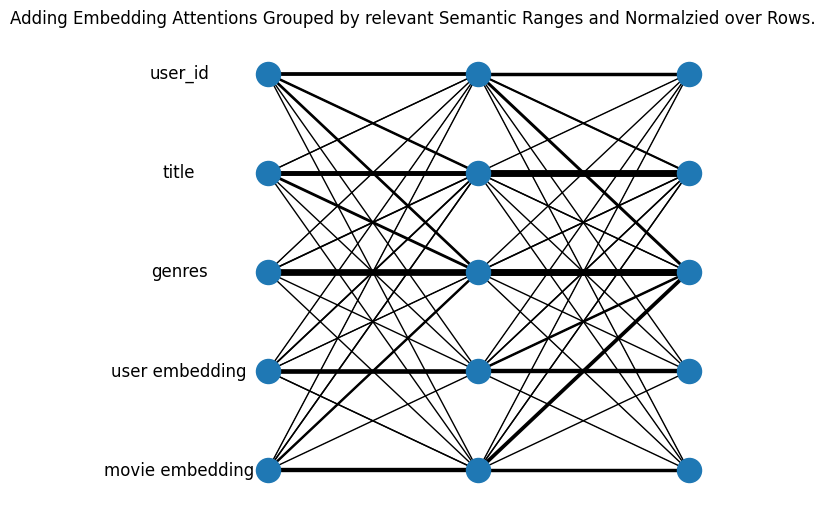

In [ ]:
vanilla_bert_only_classifier.plot_attention_graph(vanilla_attention_matrix_normalized, "Vanilla Attentions Grouped by relevant Semantic Ranges and Normalzied over Rows.")
prompt_bert_only_classifier.plot_attention_graph(prompt_attention_matrix_normalized, "Prompt Attentions Grouped by relevant Semantic Ranges and Normalzied over Rows.")
adding_embedding_bert_only_classifier.plot_attention_graph(adding_embedding_attention_matrix_normalized, "Adding Embedding Attentions Grouped by relevant Semantic Ranges and Normalzied over Rows.")

  0%|          | 0/268 [00:00<?, ?it/s]

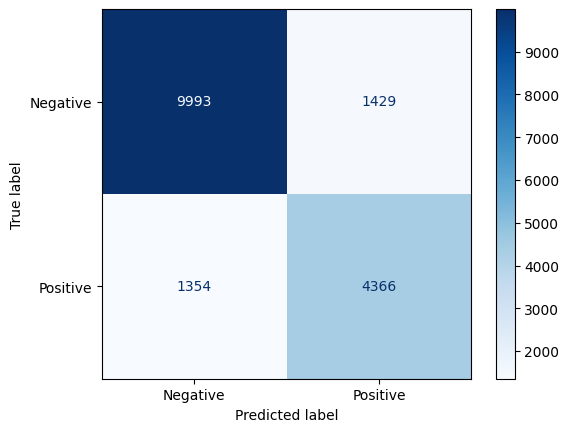

  0%|          | 0/268 [00:00<?, ?it/s]

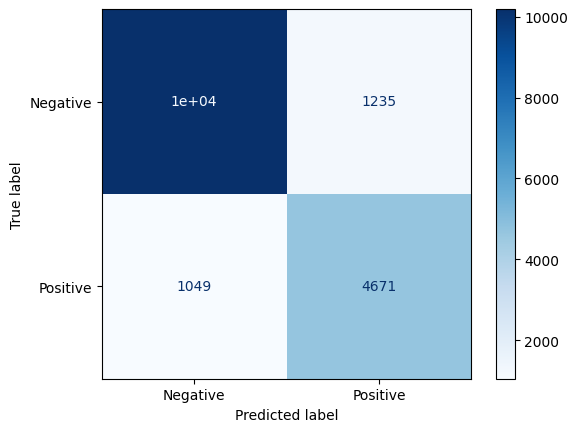

  0%|          | 0/268 [00:00<?, ?it/s]

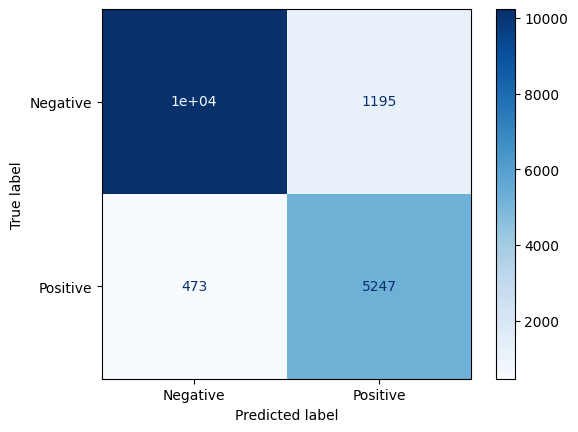